<a href="https://colab.research.google.com/github/apssouza22/cnn-for-devs/blob/master/b-vanila-neural-network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing a vanilla Backpropagation algorithm

In this section, we will learn how to implement the backpropagation algorithm from scratch using Python. 

**What is Backpropagation?**
Back-propagation is the essence of neural net training. It is the method of fine-tuning the weights of a neural net based on the error rate obtained in the previous epoch (i.e., iteration). Proper tuning of the weights allows you to reduce error rates and to make the model reliable by increasing its generalization.

Backpropagation is a short form for "backward propagation of errors." It is a standard method of training artificial neural networks. This method helps to calculate the gradient of a loss function with respects to all the weights in the network.

The backpropagation algorithm consists of two phases:
- 1. The forward pass where we pass our inputs through the network to obtain our output
classifications.

-  2. The backward pass (i.e., weight update phase) where we compute the gradient of the loss function and use this information to iteratively apply the chain rule to update the weights in our network.


<img src="ex-backpropagation.png">

In [1]:
import numpy as np

## Sigmoid or Logistic Activation Function

Neurons activation function of our choose.

Sigmoid fn Convert any value to between (0 to 1). In the image below you will see the values transformed to a range of 0-1

<img src="https://miro.medium.com/max/485/1*Xu7B5y9gp0iL5ooBj7LtWw.png">


In [2]:
	# sigmoid activation function
	def sigmoid(dotCalcResult):
		return 1.0 / (1 + np.exp(-dotCalcResult))


## Why derivative/differentiation is used ?

When updating the curve, to know in which direction and how much to change or update the curve depending upon the slope.

The error is given by the y-axis. If you’re in point A and want to reduce the error toward 0, then you need to bring the x value down. On the other hand, if you’re in point B and want to reduce the error, then you need to bring the x value up. To know which direction you should go to reduce the error, you’ll use the derivative. 

<img src="https://files.realpython.com/media/quatratic_function.002729dea332.png" width="500px">


In [3]:
# The derivative of the sigmoid which we’ll use during the backward pass

def sigmoid_deriv(activationFuncResult):
		return activationFuncResult * (1 - activationFuncResult)
    

## Learning rate

Is the step size at each iteration while moving toward a minimum of a loss function. Learning rate can not be too small or too big. 


<img src="https://srdas.github.io/DLBook/DL_images/TNN2.png">

## The dot product 

The dot product of two vectors tells you how similar they are in terms of direction and is scaled by the magnitude of the two vectors.


In [4]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

# Computing the dot product of input_vector and weights_1
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

print(f"The dot product 1 is: {dot_product_1}")

#use np instead
dot_product_2 = np.dot(input_vector, weights_2)
print(f"The dot product 2 is: {dot_product_2}")
print(f"The dot product 2 is closer: {dot_product_2} > {dot_product_1}")

The dot product 1 is: 2.1672
The dot product 2 is: 4.1259999999999994
The dot product 2 is closer: 4.1259999999999994 > 2.1672


## Bias
It sets the result when all the other independent variables are equal to zero. We are using a static value and not changing it during the learning. We are only change the weights.

A bias unit is an "extra" neuron added to each pre-output layer that stores the value of 1. Bias units aren't connected to any previous layer and in this sense don't represent a true "activity".

<a href="https://www.quora.com/What-is-bias-in-artificial-neural-network">More</a>



## Matrix multiplication

The fundamental operations of any typical neural network can be reduced to a bunch of addition and multiplication operations. Neural networks can be expressed in terms of matrices. Matrix multiplication is one of the most important mathematical operations when it comes to deep neural networks.

Below a very simple "neural net" for helping to understand matrix multiplication

In [5]:
#weights for 2 neurons
weights_for_layer1 = np.array([
	[1.5, 	-0.5],
	[-1, 	   1],
	[-1, 	   1]
])

#weights for 1 neurons
weights_for_layer2 = np.array([
	[-1],
	[1],
	[1]
])

def activation_function(x):
	return np.where(x>0, 1, 0)

def neural_net(inputs, layer_weights, activation_function):
	outputs = inputs
    #The output of a layer become the input for the subsequent layer
	for weight in layer_weights:
		bias = np.ones(shape=(outputs.shape[0], 1)) #adding 1 as a bias as an extra column
		inputs = np.hstack([bias, outputs])
		matrixMultiplied= np.matmul(inputs, weight)
		outputs = activation_function(matrixMultiplied)
	return outputs

inputs = [
	[0, 0],
	[1, 0],
	[0, 1],
	[1, 1]
]

for i in inputs:
	print(
		i,
		" -> ",
		neural_net(
			inputs=np.array([i]),
			layer_weights=[weights_for_layer1, weights_for_layer2],
			activation_function=activation_function
		)
	)

[0, 0]  ->  [[0]]
[1, 0]  ->  [[1]]
[0, 1]  ->  [[1]]
[1, 1]  ->  [[0]]


In [6]:
def feed_forward(trainDataItem, weights):
	# this list is responsible for storing the output activations for each layer as our data point x
	# forward propagates through the network. We initialize this list with x, which is simply the input data point
	predictions = [np.atleast_2d(trainDataItem)]
	# loop over the layers in the network
	for layer in np.arange(0, len(weights)):
		# feedforward the activation at the current layer by
		# taking the dot product between the activation and the weight matrix -- this is called the "net input" to the current layer
		net = predictions[layer].dot(weights[layer])
		predictions.append(sigmoid(net))
	return predictions

In [7]:
# After each forward pass through a network, backpropagation performs a backward pass while adjusting the model’s parameters (weights and biases)
def back_propagation(predictions, label, weights):
	# The first phase of backpropagation is to compute the difference between our *prediction* and the right label
	error = predictions[-1] - label

	# from here, we need to apply the chain rule and build our list of error losses
	error_losses = [error * sigmoid_deriv(predictions[-1])]

	# loop over the layers in reverse order(Back propagation ;) (ignoring the last one since we already calculated it above)
	# -2 because it start from 0
	for layer in np.arange(len(predictions) - 2, 0, -1):
		# calculating the delta diff between the previous delta diff and layer weights
		error_loss = error_losses[-1].dot(weights[layer].T)
		error_loss = error_loss * sigmoid_deriv(predictions[layer])
		error_losses.append(error_loss)

	# since we looped over our layers in reverse order we need to reverse the losses
	error_losses = error_losses[::-1]
	return error_losses

In [8]:

class NeuralNetwork:

	def __init__(self, layers, learning_rate=0.1):
		print("[INFO] starting the network with {} layers and  learn rate = {}".format(len(layers), learning_rate))
		# initialize the list of weights matrices
		self.weights = []
		self.layers = layers
		self.learning_rates = learning_rate
		self.load_random_weights(layers)

    # Loading the initial weights randomically to all layers
	def load_random_weights(self, layers):
		# start looping from the index of the first layer but stop before we reach the last two layers
		bias = 1
		for i in np.arange(0, len(layers) - 2):
			current_layer_neurons = layers[i]
			next_layer_neurons = layers[i + 1]

			# To account for the bias, we add 1 to the number of current and next layer
			# randomly initialize a weight matrix connecting the number of nodes in each respective layer together,
			rows = current_layer_neurons + bias
			columns = next_layer_neurons + bias
			w = np.random.randn(rows, columns)
			self.weights.append(w / np.sqrt(current_layer_neurons))

		# the last two layers are a special case where the input connections need a bias term but the output does not
		last_layer = layers[-1]
		before_last_layer = layers[-2]

		w = np.random.randn(before_last_layer + bias, last_layer)
		self.weights.append(w / np.sqrt(before_last_layer))

	#  this function is useful for debugging:
	def __repr__(self):
		# construct and return a string that represents the network architecture
		return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))

	def update_weights(self, predictions, error_losses):
		for layer in np.arange(0, len(self.weights)):
			# update our weights by taking the dot product of the layer
			# activations with their respective losses, then multiplying
			# this value by some small learning rate and adding to our
			# weight matrix -- this is where the actual "learning" takes place
			self.weights[layer] += -self.learning_rates * predictions[layer].T.dot(error_losses[layer])

	def train(self, data_points, labels, epochs=1000, display_update=100):
		# insert a column of 1’s as the last entry in the feature matrix -- this little trick allows us to treat the bias
		# as a trainable parameter within the weight matrix
		data_points = np.c_[data_points, np.ones((data_points.shape[0]))]
		losses = []
		# loop over the desired number of epochs
		for epoch in np.arange(0, epochs):
			# loop over each individual data point and train our network on it
			for (data, label) in zip(data_points, labels):
				self.training_step(data, label)
			
			if epoch == 0 or (epoch + 1) % 5 == 0:
				loss = self.evaluate(data_points, labels)
				losses.append(loss)
			# check to see if we should display a training update
			if epoch == 0 or (epoch + 1) % display_update == 0:
				print("[INFO] epoch={}, loss={:.7f}".format(epoch + 1, loss))
		return losses
    
	def training_step(self, data, label):
		predictions = feed_forward(data, self.weights)
		error_losses = back_propagation(predictions, label, self.weights)
		self.update_weights(predictions, error_losses)
        
	def predict(self, data_point, add_bias=True):
		# initialize the output prediction as the input features -- this
		# value will be (forward) propagated through the network to
		# obtain the final prediction
		p = np.atleast_2d(data_point)
		# check to see if the bias column should be added
		if add_bias:
			# insert a column of 1’s as the last entry in the feature matrix (bias)
			p = np.c_[p, np.ones((p.shape[0]))]

		# loop over our layers in the network
		for layer in np.arange(0, len(self.weights)):
			# computing the output prediction is as simple as taking
			# the dot product between the current activation value ‘p‘
			# and the weight matrix associated with the current layer,
			# then passing this value through a nonlinear activation
			# function
			p = sigmoid(np.dot(p, self.weights[layer]))
		return p

	def evaluate(self, trainItemData, label):
		predictions = self.predict(trainItemData, add_bias=False)
		loss = 0.5 * np.sum((predictions - label) ** 2) # MSE cost function
		return loss


## Backpropagation with Python Example: MNIST Sample

Let’s examine our Neural network with the MNIST dataset for handwritten digit recognition. This subset of the MNIST dataset is built-into the scikit-learn library and includes 1,797 example digits, each of which are 8 × 8 grayscale images (the original images are 28 × 28. When flattened, these images are represented by an 8 × 8 = 64-dim vector.

![alt text](mnist-sample.png "")


In [9]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min()) # normalization
print("[INFO] samples: {}, dim: {}".format(data.shape[0],data.shape[1]))

[INFO] loading MNIST (sample) dataset...
[INFO] samples: 1797, dim: 64


In [10]:
# construct the training and testing splits
(trainData, testData, trainLabel, testLabel) = train_test_split(data, digits.target, test_size=0.25)
testLabel

array([7, 1, 2, 0, 9, 2, 6, 9, 1, 5, 5, 8, 8, 8, 1, 1, 5, 0, 3, 5, 3, 5,
       5, 8, 2, 5, 7, 5, 2, 1, 5, 6, 7, 5, 9, 0, 1, 7, 0, 1, 0, 5, 2, 8,
       1, 6, 7, 9, 6, 6, 0, 7, 8, 9, 7, 4, 8, 0, 8, 6, 9, 5, 3, 3, 9, 6,
       0, 1, 5, 5, 4, 4, 9, 9, 5, 1, 5, 1, 0, 2, 2, 4, 5, 5, 2, 8, 4, 5,
       4, 4, 4, 6, 6, 6, 0, 9, 0, 4, 1, 8, 0, 1, 1, 9, 6, 0, 6, 6, 2, 6,
       1, 4, 2, 2, 6, 9, 5, 6, 7, 5, 8, 2, 1, 4, 4, 9, 1, 7, 8, 7, 6, 6,
       4, 3, 0, 4, 4, 2, 3, 8, 0, 1, 1, 6, 8, 3, 7, 1, 3, 0, 7, 3, 4, 8,
       4, 1, 2, 5, 6, 2, 5, 3, 2, 6, 4, 2, 8, 4, 2, 4, 1, 5, 3, 5, 3, 1,
       4, 4, 1, 5, 1, 7, 0, 0, 2, 5, 1, 1, 7, 4, 4, 9, 7, 8, 0, 3, 8, 1,
       0, 8, 0, 9, 1, 6, 9, 4, 1, 1, 7, 6, 7, 2, 8, 1, 2, 9, 1, 7, 0, 6,
       6, 8, 9, 7, 8, 2, 7, 4, 4, 3, 0, 9, 9, 2, 4, 4, 1, 9, 1, 9, 7, 9,
       8, 5, 2, 6, 1, 4, 9, 3, 3, 2, 3, 4, 8, 9, 9, 9, 3, 8, 5, 6, 0, 7,
       4, 6, 1, 7, 6, 3, 3, 3, 7, 1, 0, 3, 0, 2, 7, 6, 9, 6, 5, 8, 4, 8,
       7, 7, 5, 3, 8, 4, 4, 0, 0, 1, 3, 8, 3, 4, 8,

In [11]:
#Binarize the labels. convert the labels from integers to vectors, tranform in a list with 0s and 1
trainLabel = LabelBinarizer().fit_transform(trainLabel)
testLabel = LabelBinarizer().fit_transform(testLabel)
testLabel

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [12]:
# train the network
print("[INFO] training network...")
# number of nodes for each layer, the last one is the number of digits(options)
nn = NeuralNetwork([trainData.shape[1], 32, 16, 10])

print("[INFO] {}".format(nn))
losses = nn.train(trainData, trainLabel, epochs=1000)

[INFO] training network...
[INFO] starting the network with 4 layers and  learn rate = 0.1
[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1, loss=606.4668294
[INFO] epoch=100, loss=5.8467567
[INFO] epoch=200, loss=1.1805443
[INFO] epoch=300, loss=0.5506828
[INFO] epoch=400, loss=0.3591140
[INFO] epoch=500, loss=0.2643911
[INFO] epoch=600, loss=0.2081423
[INFO] epoch=700, loss=0.1710323
[INFO] epoch=800, loss=0.1447929
[INFO] epoch=900, loss=0.1253026
[INFO] epoch=1000, loss=0.1102806


Text(0, 0.5, 'loss vs. No. of epochs')

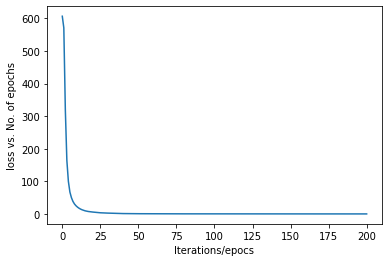

In [13]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Iterations/epocs")
plt.ylabel("loss vs. No. of epochs")

In [14]:
def evaluate(testData, testLabel):
    predictions = [nn.predict(item) for item in testData]
    predictions = [item.argmax(axis=1) for item in predictions]
    print(classification_report(testLabel.argmax(axis=1), predictions))

evaluate(testData, testLabel)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.95      1.00      0.97        54
           2       0.98      1.00      0.99        50
           3       0.98      0.98      0.98        44
           4       0.98      0.96      0.97        48
           5       0.93      0.98      0.95        41
           6       0.98      0.98      0.98        45
           7       1.00      1.00      1.00        37
           8       0.95      0.91      0.93        43
           9       0.97      0.95      0.96        41

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



Look at the precision column and you will see the percentage of right prediction to each number. The closer to 1 the best

In [15]:
print("[INFO] test network...")
predictions = nn.predict(testData[0])
predictions.argmax(axis=1), testLabel[0]

[INFO] test network...


(array([7]), array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))

# Code details

In [16]:
[np.atleast_2d([2,3])][0]

array([[2, 3]])

In [17]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica", "Vicky")
x = zip(a, b)

#use the tuple() function to display a readable version of the result:
tuple(x)

(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))

In [18]:
np.random.randn??

In [19]:
np.random.randn(2, 4)

array([[-1.14528681,  1.18217985, -0.75807615, -1.50675799],
       [ 0.85128022, -1.14917183, -1.55895032,  0.46985881]])

In [20]:
np.random.randn(2, 4) / np.sqrt(3)

array([[ 0.44938427,  0.31767631,  0.00960134,  0.35841222],
       [-0.69108222, -0.73861315,  0.01867593,  0.56131515]])

In [21]:
np.c_??
